<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:#CFE8FF;      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">

  <!-- logo sin cambios -->
  <img src="data/imgs/logo.png" align="right" width="200" alt="Logo">

  <!-- Datathon sin cambios -->
  <font color="#1874CD"><h1 align="left" style="margin-top:0;"><b>Datathon PDS06</b></h1></font>

  <!-- Resto en azul oscuro -->
  <h2 align="left" style="color:#003366;margin:0;"><b>Christian Esteve Orts</b></h2>
  <h3 align="left" style="color:#003366;margin:0;">Notebook: regresión lineal</h3>
</div>

<hr>


El ejercicio consta de un problema de regresión, siendo la última columna el target y el resto las potenciales variables predictoras.


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Librerías</b></h2>
</div>

In [182]:
# Gestión de la estrucutra de los datos
import pandas as pd
import numpy as np

# Gestión de ruta al dataset, por si se necesita cambiar en un futuro a una base de datos o servicio en la nube
from pathlib import Path

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
# Para test normalidad y distribución normal
from scipy import stats  # Para test de normalidad saphiro-wilk

# Para dividir el dataset en train y test
from sklearn.model_selection import train_test_split

#Preprocesado de datos
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox, yeojohnson


# Statsmodels. Para poder usar notación de fórmula y notación de sklearn
import statsmodels.api as sm

# Para test homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan

# Para test colinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Importación del dataset y comprobación rápida</b></h2>
</div>


In [183]:

DATA_PATH = Path("data/train.xlsx")  # cámbialo aquí si hace falta
df = pd.read_excel(DATA_PATH)
print(f"Número de observaciones y columnas: {df.shape}")
df.head(10)

Número de observaciones y columnas: (772, 11)


x1      x2        x3      x4     x5       x6      x7    x8  \
0   27585.8881    0.00  2.215558  176.46   4.49  1058.60  780.09  28.0   
1   45693.3376   98.06  1.406881     NaN   6.65  1066.00  785.52   NaN   
2  110889.0000    0.00  0.000000  192.00    NaN   931.20  842.60   7.0   
3  241081.0000   26.00  2.093422  210.00   3.93   882.00  699.00  28.0   
4   34670.4400  124.10  0.000000  185.70   0.00  1083.40     NaN  28.0   
5          NaN     NaN       NaN  221.40  10.50   819.20  778.40  28.0   
6   62500.0000    0.00  1.985382  187.42    NaN   956.86  861.17   3.0   
7  133956.0000  187.00  0.000000  191.30   6.60   824.30  756.90   NaN   
8   99225.0000  137.00  0.000000  145.00   5.90  1130.00     NaN  28.0   
9   98156.8900  262.20  0.000000  175.50   8.60  1046.90  611.80   3.0   

         x9       x10    deseada  
0 -1.867265  0.900023  21.539230  
1  0.633919  0.862797  17.836744  
2 -0.203045  0.461557  23.404952  
3 -1.382800  0.338268  55.551081  
4 -0.510016  0.603488  17.596806  
5 -1.280304  0.634104  31.420111  
6  0.404982  0.404319  13.817099  
7       NaN  0.071008  65.909079  
8 -0.599393  0.239180  81.751169  
9  1.538037       NaN  28.799413

Comprobación rápida de datos faltantes


In [184]:
# NAs
df.isna().sum().sum()

np.int64(774)

Se puede observar de forma rápida que el dataset tiene datos faltantes


In [185]:
# Obtenemos algunos estadísticos para ver la estructura de los datos para situar los datos faltantes
print(f"Recordar el número de observaciones: {df.shape[0]}")

# T es para transponer la matriz y mejorar la legibilidad
display(df.describe().T)

Recordar el número de observaciones: 772


count          mean           std           min           25%  \
x1       706.0  92761.097733  68338.519818  10404.000000  37900.302400   
x2       685.0     72.037898     86.135309      0.000000      0.000000   
x3       703.0      0.882659      1.026148      0.000000      0.000000   
x4       690.0    181.944594     21.474526    121.750000    164.925000   
x5       698.0      6.168636      6.033556      0.000000      0.000000   
x6       704.0    971.787997     79.482087    801.000000    932.000000   
x7       699.0    772.917167     81.459988    594.000000    725.950000   
x8       687.0     45.914119     62.163402      1.000000     14.000000   
x9       694.0      0.018116      0.979987     -3.241267     -0.651777   
x10      680.0      0.496178      0.287545      0.005230      0.248967   
deseada  772.0     35.895710     16.786940      2.331808     23.742796   

                  50%            75%            max  
x1       76729.000000  131478.760000  291600.000000  
x2          20.000000     141.300000     359.400000  
x3           0.000000       2.073865       2.292256  
x4         185.700000     192.000000     247.000000  
x5           6.000000      10.100000      32.200000  
x6         967.040000    1034.250000    1145.000000  
x7         779.700000     824.000000     992.600000  
x8          28.000000      56.000000     365.000000  
x9           0.046709       0.654966       2.720169  
x10          0.497494       0.731890       0.998348  
deseada     34.222141      45.865322      82.599225

Comparando la columna [mean] con el 50% las variables x4,x6, x7 y x10 parecen tener las mejores distribuciones. También la deseada.


Si comparamos el total de registros [count] de la columna target "deseada" con las variables predictoras, se puede comprobar que hay datos faltantes en todas las variables.


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Análisis exploratorio de los datos</b></h2>
</div>


### Gráfico de distribución para cada variable numérica


Text(0.5, 0.98, 'Distribución de variables numéricas')

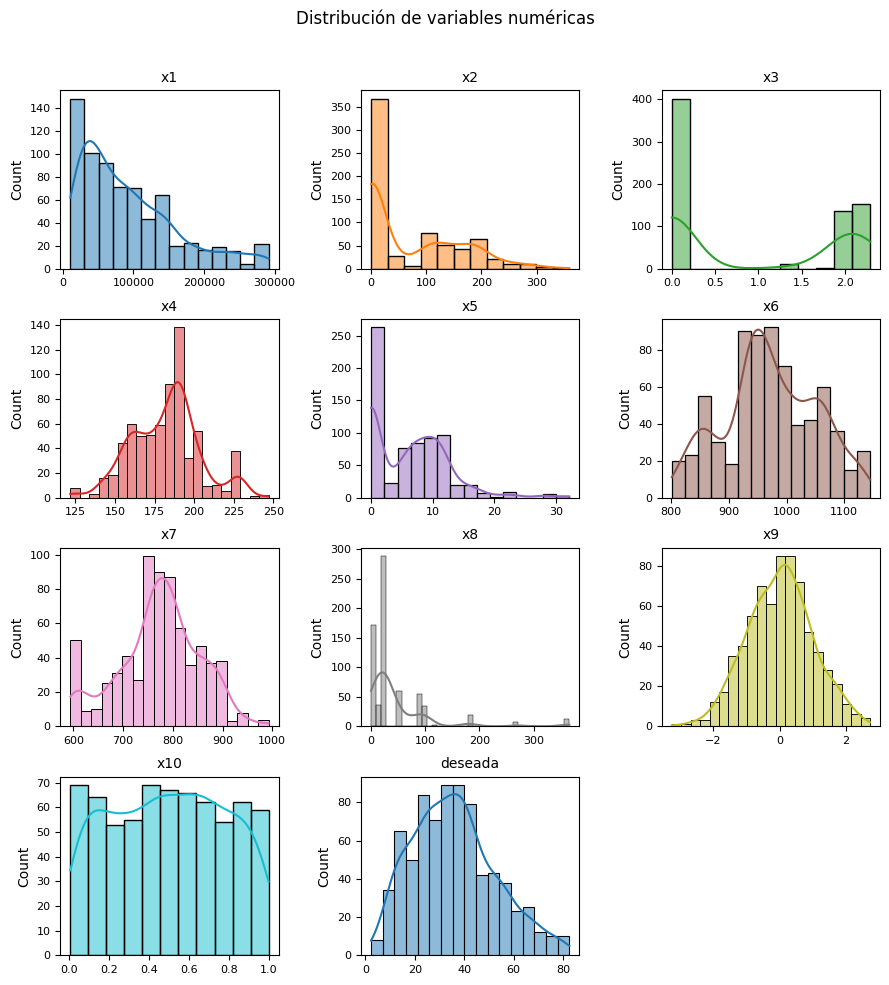

In [186]:
# Repasar los comentarios del código y cambiarlos a mejoras expositivas

import math  # Para calcular el número de filas necesarias


# --- Selección de variables y dimensionado del lienzo ---

columnas_numeric = df.select_dtypes(include=np.number).columns
n_vars = len(columnas_numeric)
if n_vars == 0:
    raise ValueError("El DataFrame no contiene columnas numéricas.")

# Máximo de columnas de subplots por fila (ajustable cambiando esta variable)
ncols = 3
# Filas necesarias para cubrir todas las variables
nrows = math.ceil(n_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=(3*ncols, 2.5*nrows))

# Convertir a array 1D para indexar sin errores, incluso si hay una sola fila/columna
axes = np.atleast_1d(axes).ravel()

# Paleta de colores (rotará si hay más variables que colores)
palette = sns.color_palette(n_colors=max(n_vars, 6))

# --- Bucle de trazado: un histograma por variable numérica ---
for i, col in enumerate(columnas_numeric):
    ax = axes[i]
    sns.histplot(
        data=df, x=col, stat="count", kde=True,
        color=palette[i % len(palette)], ax=ax
    )
    ax.set_title(col, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.set_xlabel("")

# --- Ocultar ejes no usados (si la rejilla quedó más grande de lo necesario) ---
for ax in axes[n_vars:]:
    ax.set_visible(False)

# --- Ajustes finales de maquetación ---
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de variables numéricas', fontsize=12)

Según las gráficas , las variables x4, x6, x7 y x9 tienen las mejores distribuciones. La columna a predecir [deseada] tiene una buena distribución.


### Test de Saphiro

Para


In [187]:
# Normalidad en la variable respuesta "deseada"

shapiro_test = stats.shapiro(df["deseada"])
print(
    f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

Test Shapiro-Wilk: estadístico = 0.977448345500092, p-value = 1.538592711759505e-09


El test Shapiro-Wilk contrasta la hipótesis nula de distribución normal de los datos. La variable respuesta [deseada] obtenemos un p-valor superior a 0,05 (nivel de confianza de un 95%) y, por lo tanto, podemos aceptar la hipótesis nula y asumir que la distrubución es normal.


# Correlaciones


Generamos la matriz directamente, ya que la visualización es mejor.


<Axes: >

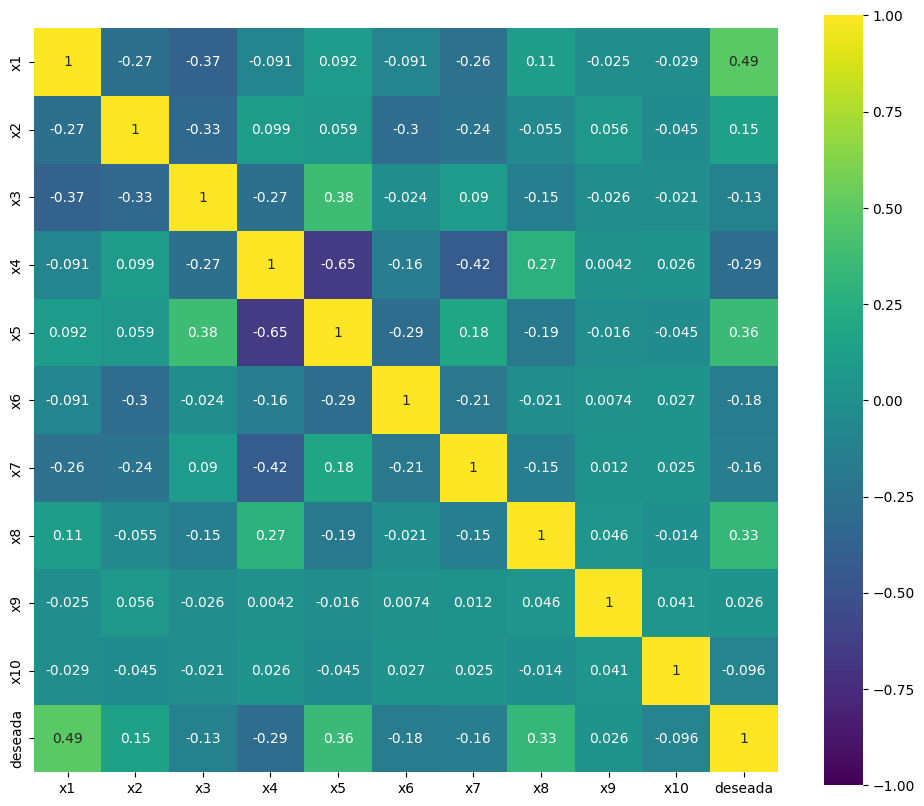

In [188]:
# Matriz de correlaciones entre variables numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),
            cmap="viridis",
            vmin=-1, vmax=1,  # Evitamos el cálculo automático de los límites
            annot=True,
            cbar=True,
            square=True)

Conclusión: x1 es el predictor lineal más potente; x5, x8 y x4 (con signo opuesto) aportan información adicional. El resto apenas correlaciona linealmente con la respuesta.

La matriz revela que x1 es el predictor lineal dominante (ρ ≈ 0.49) seguido de x5 y x8; x4 ejerce un efecto inverso (ρ ≈ -0.29).

La única colinealidad preocupante es el fuerte anticorrelación x4-x5 (-0.65). Por ello, vigilaré VIF o usaré regularización para evitar inestabilidad en un modelo lineal. En cambio, un modelo basado en árboles manejaría bien estas correlaciones moderadas.


# Distribución de cada variable enfrentada al resto


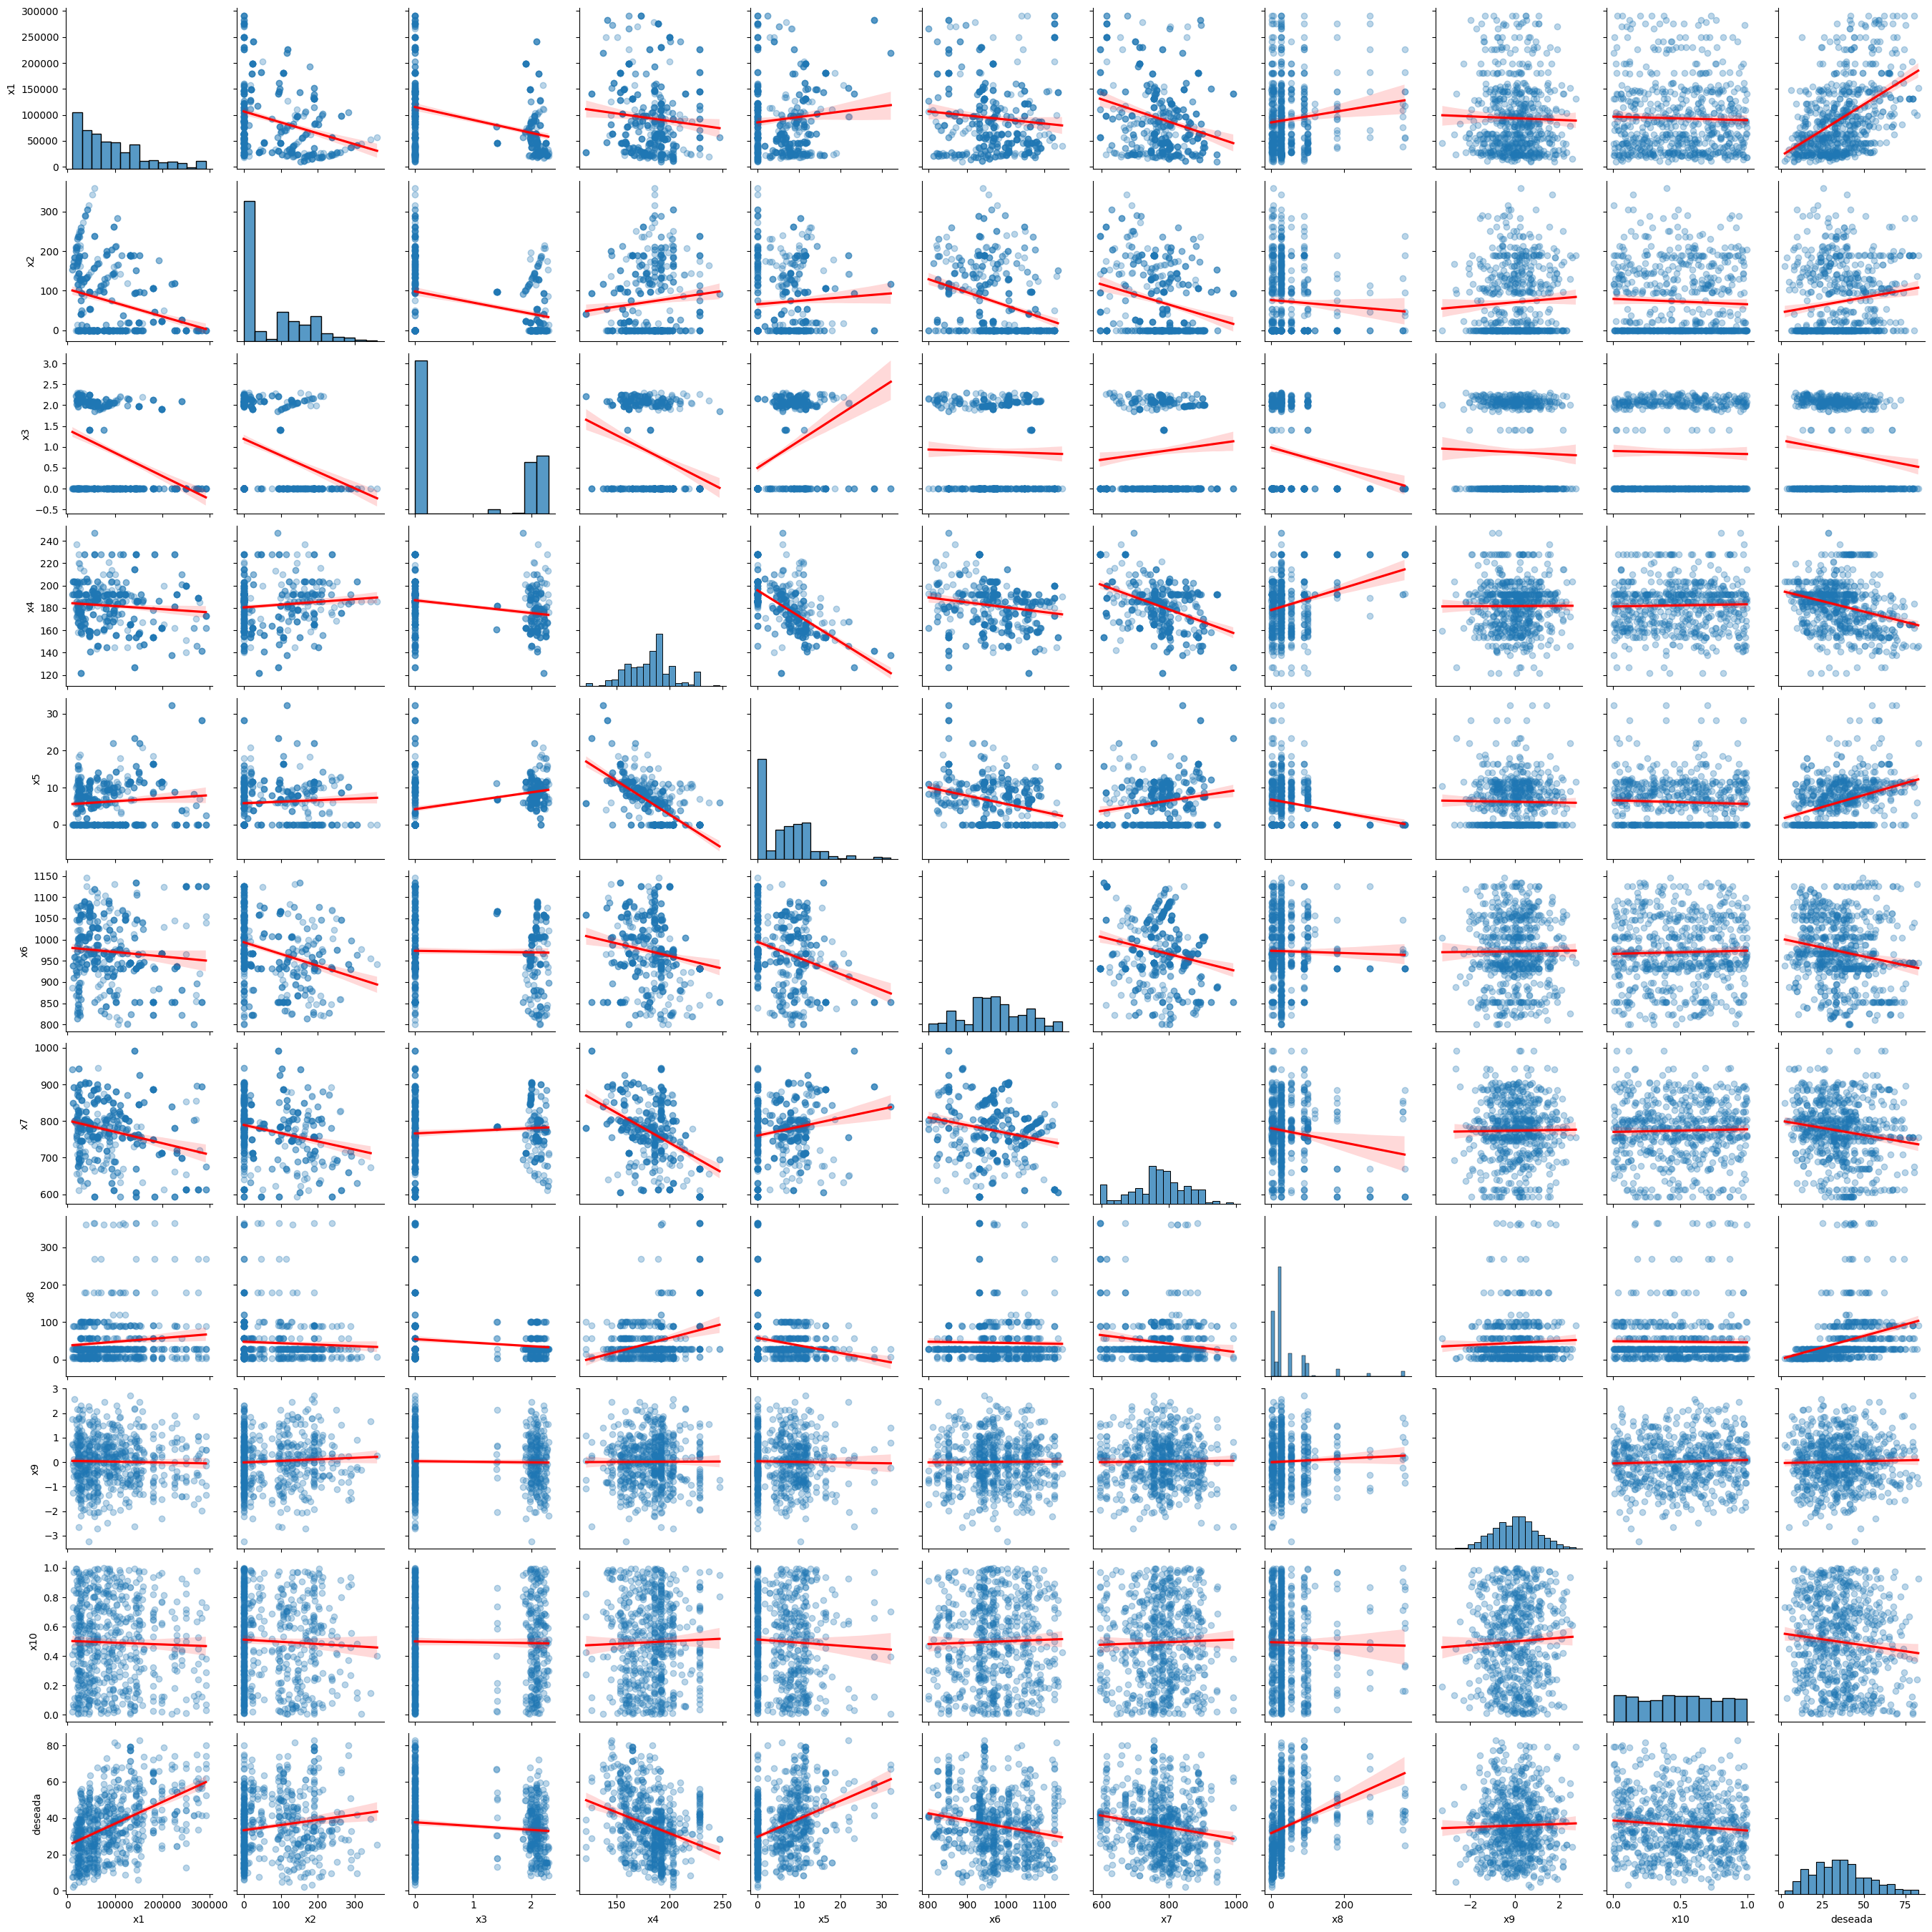

In [189]:


# Distribución de cada variable enfrentada al resto
sns.pairplot(df, kind="reg",
             plot_kws={"line_kws": {"color": "red"},
                       "scatter_kws": {"alpha": 0.3}})

plt.show()

Tendencias lineales claras con el target: x1, x5, x8 (positivas) x4 (negativa). Refuerza lo se ve en la matriz de correlación: serán los predictores más prometedores.

Relación negativa marcada entre predictores x4 ↔ x5 Evidencia visual de su colinealidad moderada (r ≈ −0,65). Conviene monitorizar VIF o usar regularización.

Escalas muy dispares, por ejemplo x1 y x9. Será necesario la normalización de las variables predictoras.

Las distribucuines de cola pesada de x1 (potancialmente el predictor principal), x2 y x5 son susceptibles de necesitar transformación por BosCox o Yeo-Johnson.

x9 y, en menor medida, x10 (todas las dispersión–[deseada] son nubes sin patrón)

x3 es pobre en colinealidad y presenta una gran cantidad de valores en 0, por lo que es candidata a excluirse.



### Conclusiones para transformaciones de las variables

x1
Vacíos: 8,55 %. Imputación: mediana. No tocar ceros (no hay).

Transformación: Box-Cox (todos > 0, asimetría derecha moderada ~1.10).

Descartar: No (r con objetivo ≈ +0,49).

x2
Vacíos: 11,27 %. Imputación: mediana.
Ceros: 41,3 % (valor real, mantener).

Transformación: Yeo-Johnson (admite 0), asimetría ~0,84.
(Opcional y recomendable: añadir x2_bin=(x2>0) para capturar “presencia/ausencia”).*

Descartar: No por ahora (r ≈ +0,15).

x3
Vacíos: 8,94 %. Imputación: mediana.
Ceros: 52,1 % (exceso de ceros, mantener como valor real).

Transformación: Yeo-Johnson.
(Opcional recomendable: x3_bin=(x3>0); mejora linealidad al separar presencia/magnitud).

Descartar: No (aunque r es baja ≈ −0,13, puede aportar combinado).

x4
Vacíos: 10,62 %. Imputación: mediana. Ceros: 0.

Transformación: Ninguna (distribución casi simétrica, rango acotado).

Descartar: No (r ≈ −0,29).

x5
Vacíos: 9,59 %. Imputación: mediana.
Ceros: 33,4 % (mantener).

Transformación: Yeo-Johnson (asimetría ~0,96).
(Opcional recomendable: x5_bin=(x5>0)).

Descartar: No (r ≈ +0,36).

x6
Vacíos: 8,81 %. Imputación: mediana. Ceros: 0.

Transformación: Ninguna (distribución casi simétrica).

Descartar: No (r ≈ −0,18).

x7
Vacíos: 9,46 %. Imputación: mediana. Ceros: 0.

Transformación: Ninguna (ligera asimetría izquierda).

Descartar: No (r ≈ −0,16).

x8
Vacíos: 11,01 %. Imputación: mediana. Ceros: 0. Mín=1.

Transformación: Box-Cox (asimetría fuerte ~3,26; todos > 0).

Descartar: No (r ≈ +0,33).

x9
Vacíos: 10,10 %. Imputación: mediana. Puede ser ya estandarizada (μ≈0).

Transformación: Ninguna / YJ innecesario (hay negativos, pero distribución ya casi simétrica).

Descartar: Sí, de entrada (r ≈ +0,03, señal prácticamente nula en un modelo lineal sin interacciones). Si luego usamos regularización, se puede re-evaluar.

x10
Vacíos: 11,92 %. Imputación: mediana. Ceros verdaderos: no (mín ~0,005).

Transformación: Ninguna (0–1 casi simétrica).

Descartar: No (r ≈ −0,10; débil pero puede sumar un poco).

<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>División del dataset</b></h2>
</div>


In [190]:
# División en entrenamiento y test
df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42, shuffle=True)

# Ahora dividimos en X e y
# Dataframe entrenamiento con la variable respuesta
y_train = df_train["deseada"]
y_test = df_test["deseada"]  # Dataframe test con la variable respuesta

# Dataframe entrenamiento con las variables predictoras
X_train = df_train.drop("deseada", axis=1)
# Dataframe test con las variables predictoras
X_test = df_test.drop("deseada", axis=1)

In [191]:
# Comprobamos dimensiones
print(f"Dimensiones train: {X_train.shape}.")
print(f"Dimensiones test: {X_test.shape}.")

Dimensiones train: (617, 10).
Dimensiones test: (155, 10).


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Transformación de los datos</b></h2>
</div>


In [192]:
#importacion de la funcion de transformación
from Transformacion import FitTransformColumn

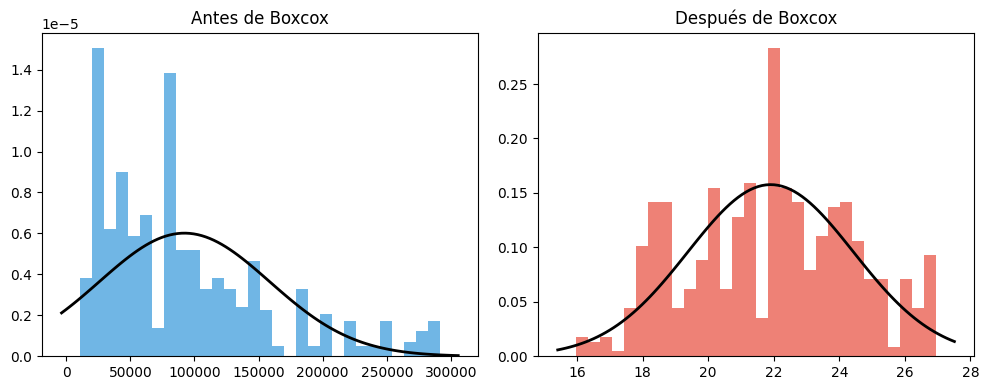

Transformación de x1: lambda = 0.1089
Primeros 5 registros de x1 transformado:
[18.20201873 24.02505176 18.8438549  21.35593634 24.61822144]


In [193]:
# Transformación para x1
#Vacíos: 8,55 %. Imputación: mediana.

x1 = X_train['x1']
x1_median = float(x1.median())
x1_imputed = x1.fillna(x1_median)

#Transformación: Box-Cox (todos > 0).
x1_transformed, x1_lambda = FitTransformColumn(x1_imputed, method='boxcox')

print (f"Transformación de x1: lambda = {x1_lambda:.4f}")

# ver los 5 primeros registros de x1_transformed
print("Primeros 5 registros de x1 transformado:")
print(x1_transformed[:5]) 



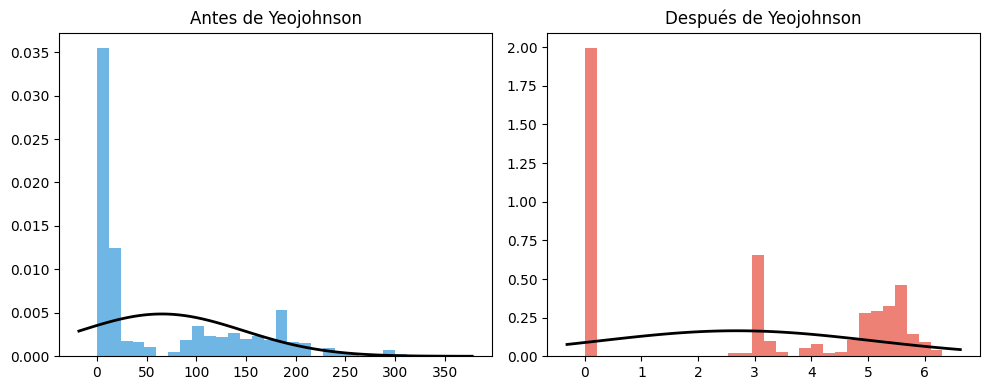

Transformación de x2: lambda = 0.0237
Primeros 5 registros de x2 transformado:
[0.         5.57465638 3.93566835 0.         0.        ]


In [194]:
# Transformación para x2

# Vacíos: 11,27 %. Imputación: mediana.
# Ceros: 41,3 % (valor real, mantener).

x2 = X_train['x2']
x2_median = float(x2.median())
x2_imputed = x2.fillna(x2_median)

# Transformación: Yeo-Johnson (admite 0).
x2_transformed, x2_lambda = FitTransformColumn(x2_imputed, method='yeojohnson')

print (f"Transformación de x2: lambda = {x2_lambda:.4f}")

# ver los 5 primeros registros de x2_trnasformed
print("Primeros 5 registros de x2 transformado:")
print(x2_transformed[:5]) 




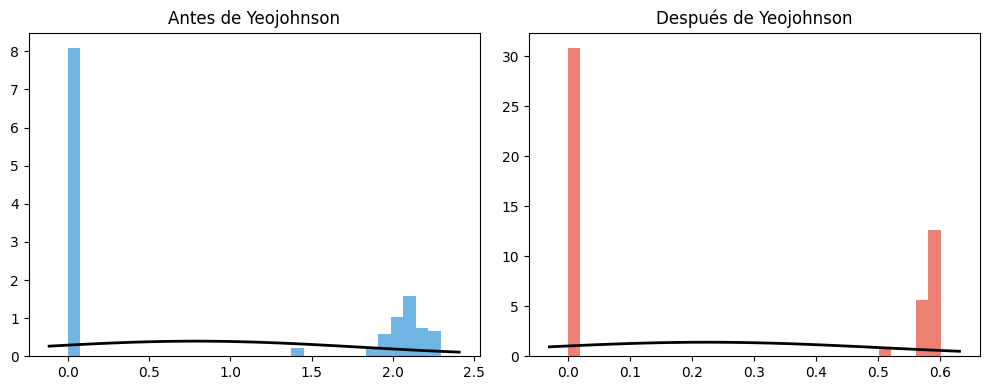

Transformación de x3: lambda = -1.3156
Primeros 5 registros de x3 transformado:
[0.59998879 0.         0.59669803 0.58088572 0.        ]


In [195]:
#Transformación para x3

#Vacíos: 8,94 %. Imputación: mediana.

x3 = X_train['x3']
x3_median = float(x3.median())
x3_imputed = x3.fillna(x3_median)

# Ceros: 52,1 % (exceso de ceros, mantener como valor real).

#Transformación: Yeo-Johnson.

x3_transformed, x3_lambda = FitTransformColumn(x3_imputed, method='yeojohnson')

print (f"Transformación de x3: lambda = {x3_lambda:.4f}")

# ver los 5 primeros registros de x3_trnasformed
print("Primeros 5 registros de x3 transformado:")
print(x3_transformed[:5]) 

Text(0.5, 0, 'Valor')

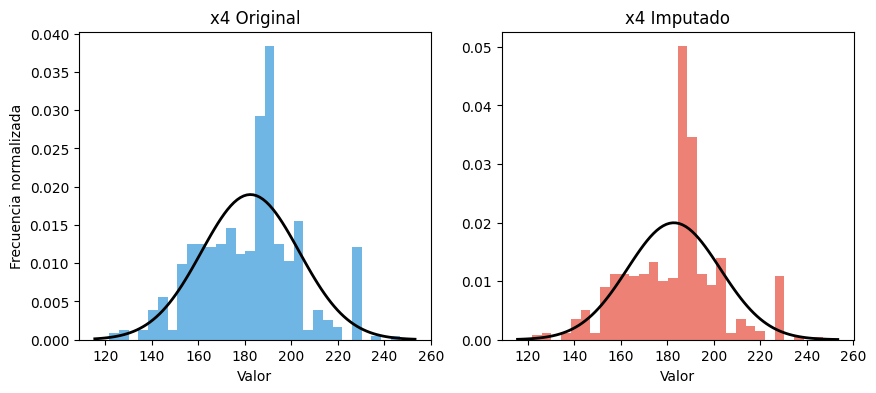

In [196]:
#transformación para x4

#Vacíos: 10,62 %. Imputación: mediana. Ceros: 0.

x4 = X_train['x4']
x4_median = float(x4.median())
x4_imputed = x4.fillna(x4_median)

#Transformación: Ninguna (distribución casi simétrica, rango acotado).

# Mostrar histogramas (antes y después de imputar)
colors = ['#3498db', '#e74c3c']
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# --- Histograma x4 original ---
axes[0].hist(x4, bins=30, color=colors[0], alpha=0.7, density=True)
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x4), np.std(x4))
axes[0].plot(x, p, 'k-', linewidth=2)
axes[0].set_title('x4 Original', fontsize=12)
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia normalizada')

# --- Histograma x4 imputado ---
axes[1].hist(x4_imputed, bins=30, color=colors[1], alpha=0.7, density=True)
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x4_imputed), np.std(x4_imputed))
axes[1].plot(x, p, 'k-', linewidth=2)
axes[1].set_title('x4 Imputado', fontsize=12)
axes[1].set_xlabel('Valor')


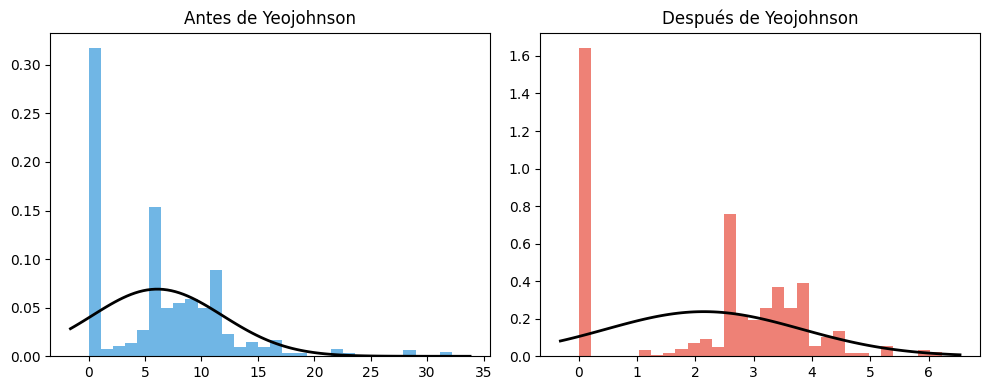

Transformación de x5: lambda = 0.3018
Primeros 5 registros de x5 transformado:
[3.87224801 2.89285782 2.57472576 4.00293211 0.        ]


In [197]:
# Vacíos: 9,59 %. Imputación: mediana.

x5 = X_train['x5']
x5_missing = int(x5.isna().sum())
x5_zeros = int((x5 == 0).sum())
x5_median = float(x5.median())

# Imputación
x5_imputed = x5.fillna(x5_median)

# Ceros: 33,4 % (mantener).

# Transformación: Yeo-Johnson (asimetría ~0,96).
x5_transformed, x5_lambda = FitTransformColumn(x5_imputed, method='yeojohnson')

print (f"Transformación de x5: lambda = {x5_lambda:.4f}")

# ver los 5 primeros registros de x5_trnasformed
print("Primeros 5 registros de x5 transformado:")
print(x5_transformed[:5]) 



Text(0.5, 0, 'Valor')

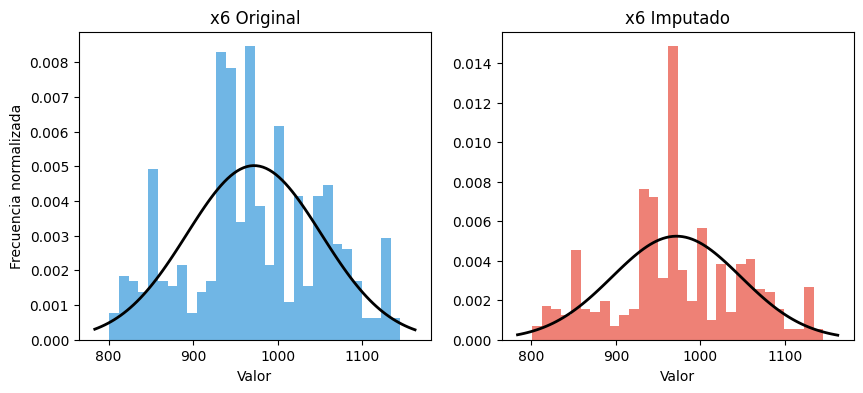

In [198]:
# Transformación para x6
#Vacíos: 8,81 %. Imputación: mediana. Ceros: 0.
x6 = X_train['x6']
x6_median = float(x6.median())
x6_imputed = x6.fillna(x6_median)

# Transformación: Ninguna (distribución casi simétrica).


# Mostrar histogramas (antes y después de imputar)
colors = ['#3498db', '#e74c3c']
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# --- Histograma x6 original ---
axes[0].hist(x6, bins=30, color=colors[0], alpha=0.7, density=True)
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x6), np.std(x6))
axes[0].plot(x, p, 'k-', linewidth=2)
axes[0].set_title('x6 Original', fontsize=12)
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia normalizada')

# --- Histograma x6 imputado ---
axes[1].hist(x6_imputed, bins=30, color=colors[1], alpha=0.7, density=True)
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x6_imputed), np.std(x6_imputed))
axes[1].plot(x, p, 'k-', linewidth=2)
axes[1].set_title('x6 Imputado', fontsize=12)
axes[1].set_xlabel('Valor')



Text(0.5, 0, 'Valor')

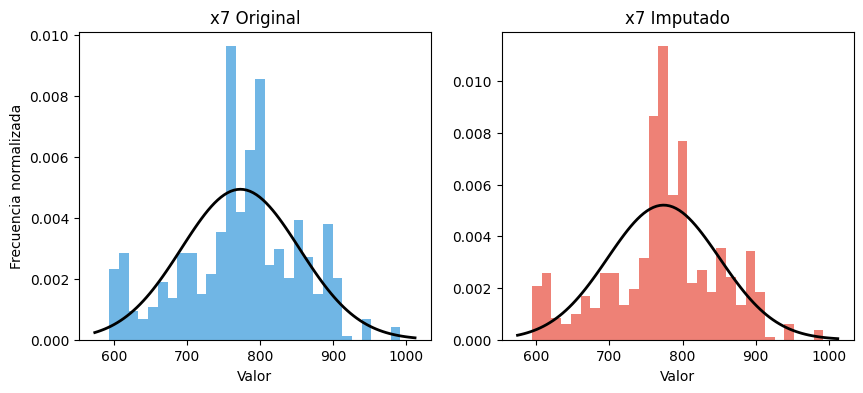

In [199]:
# Transformación para x7
#Vacíos: 9,46 %. Imputación: mediana. Ceros: 0.
x7 = X_train['x7']
x7_median = float(x7.median())
x7_imputed = x7.fillna(x7_median)


#Transformación: Ninguna (ligera asimetría izquierda).

# Mostrar histogramas (antes y después de imputar)
colors = ['#3498db', '#e74c3c']
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# --- Histograma x7 original ---
axes[0].hist(x7, bins=30, color=colors[0], alpha=0.7, density=True)
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x7), np.std(x7))
axes[0].plot(x, p, 'k-', linewidth=2)
axes[0].set_title('x7 Original', fontsize=12)
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia normalizada')

# --- Histograma x7 imputado ---
axes[1].hist(x7_imputed, bins=30, color=colors[1], alpha=0.7, density=True)
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x7_imputed), np.std(x7_imputed))
axes[1].plot(x, p, 'k-', linewidth=2)
axes[1].set_title('x7 Imputado', fontsize=12)
axes[1].set_xlabel('Valor')


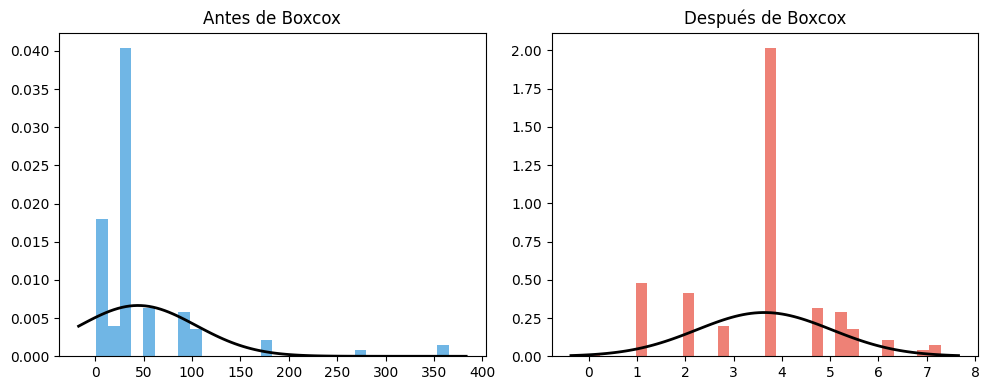

Transformación de x8: lambda = 0.0695
Primeros 5 registros de x8 transformado:
[3.74944727 3.74944727 1.14162228 2.89645709 3.74944727]


In [200]:
# Transformación para x8
#Vacíos: 11,01 %. Imputación: mediana. Ceros: 0.
x8 = X_train['x8']
x8_missing = int(x8.isna().sum())
x8_median = float(x8.median())
x8_imputed = x8.fillna(x8_median)

#Transformación: Box-Cox (asimetría fuerte ~3,26; todos > 0).
x8_transformed, x8_lambda = FitTransformColumn(x8_imputed, method='boxcox')


print (f"Transformación de x8: lambda = {x8_lambda:.4f}")

# ver los 5 primeros registros de x8_trnasformed
print("Primeros 5 registros de x8 transformado:")
print(x8_transformed[:5]) 



In [201]:
# Transformación para x9
#Vacíos: 10,10 %. Imputación: mediana.
x9 = X_train['x9']
x9_missing = int(x9.isna().sum())
x9_median = float(x9.median())
x9_imputed = x9.fillna(x9_median)

# Transformación: Ninguna / YJ innecesario (hay negativos, pero distribución ya casi simétrica).

<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;"> Descartar x9: Sí, de entrada (r ≈ +0,03, señal prácticamente nula en un modelo lineal sin interacciones).
</div> 

Text(0.5, 0, 'Valor')

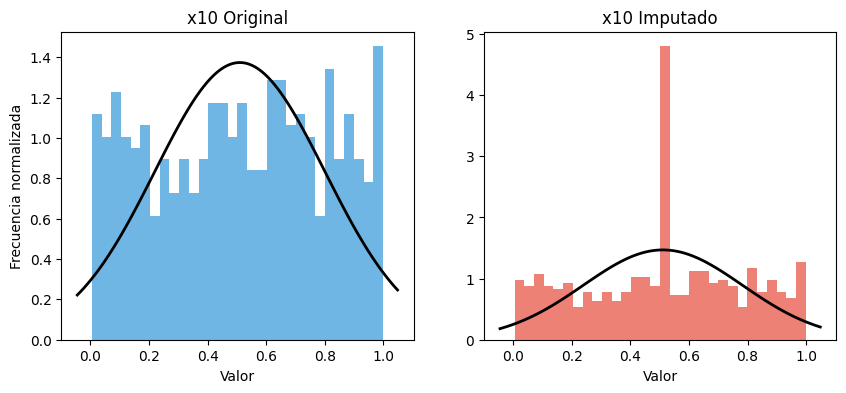

In [202]:
# Transformacion para x10
#Vacíos: 11,92 %. Imputación: mediana.
x10 = X_train['x10']
x10_missing = int(x10.isna().sum())
x10_median = float(x10.median())
x10_imputed = x10.fillna(x10_median)

# Transformación: Ninguna (0–1 casi simétrica).

# Mostrar histogramas (antes y después de imputar)
colors = ['#3498db', '#e74c3c']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# --- Histograma x10 original ---
axes[0].hist(x10, bins=30, color=colors[0], alpha=0.7, density=True)
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x10), np.std(x10))
axes[0].plot(x, p, 'k-', linewidth=2)
axes[0].set_title('x10 Original', fontsize=12)
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia normalizada')
# --- Histograma x10 imputado ---
axes[1].hist(x10_imputed, bins=30, color=colors[1], alpha=0.7, density=True)
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x10_imputed), np.std(x10_imputed))
axes[1].plot(x, p, 'k-', linewidth=2)
axes[1].set_title('x10 Imputado', fontsize=12)
axes[1].set_xlabel('Valor')


### Ensamble de un dataframe que será x_train_t con los datos transformados para entrenamiento

In [203]:
# Ensambla el DataFrame transformado de TRAIN (sin x9)
X_train_t = pd.DataFrame({
    'x1':  pd.Series(x1_transformed, index=X_train.index, name='x1'),
    'x2':  pd.Series(x2_transformed, index=X_train.index, name='x2'),
    'x3':  pd.Series(x3_transformed, index=X_train.index, name='x3'),
    'x4':  x4_imputed,
    'x5':  pd.Series(x5_transformed, index=X_train.index, name='x5'),
    'x6':  x6_imputed,
    'x7':  x7_imputed,
    'x8':  pd.Series(x8_transformed, index=X_train.index, name='x8'),
    # 'x9':  ...  # descartada por baja correlación
    'x10': x10_imputed,
})
X_train_t = X_train_t[['x1','x2','x3','x4','x5','x6','x7','x8','x10']]  # orden limpio

print(X_train_t.shape, X_train_t.columns.tolist())

(617, 9) ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10']


### Aplicación de los lambda y medias en el dataframe de x_test, creando un nuevo dataframe x_test_t

In [204]:
def apply_boxcox(series, median, lam):
    s = series.fillna(median).astype(float).to_numpy()
    return pd.Series(boxcox(s, lmbda=lam), index=series.index, name=series.name)

def apply_yeojohnson(series, median, lam):
    s = series.fillna(median).astype(float).to_numpy()
    return pd.Series(yeojohnson(s, lmbda=lam), index=series.index, name=series.name)

# Construye TEST transformado usando tus medianas y lambdas de TRAIN (sin recomputar nada)
X_test_t = pd.DataFrame({
    'x1':  apply_boxcox(    X_test['x1'],  x1_median,  x1_lambda),
    'x2':  apply_yeojohnson(X_test['x2'],  x2_median,  x2_lambda),
    'x3':  apply_yeojohnson(X_test['x3'],  x3_median,  x3_lambda),
    'x4':  X_test['x4'].fillna(x4_median).astype(float),
    'x5':  apply_yeojohnson(X_test['x5'],  x5_median,  x5_lambda),
    'x6':  X_test['x6'].fillna(x6_median).astype(float),
    'x7':  X_test['x7'].fillna(x7_median).astype(float),
    'x8':  apply_boxcox(    X_test['x8'],  x8_median,  x8_lambda),
    # 'x9': (omitida si no la usas)
    'x10': X_test['x10'].fillna(x10_median).astype(float),
}, index=X_test.index)[X_train_t.columns]  # mismo orden que TRAIN

### Estandarización, la aplicamos creando los dataframe x_train_s y x_test_s

In [205]:
# Escalado (fit en TRAIN, transform en TEST)
scaler = StandardScaler()

X_train_s = pd.DataFrame(scaler.fit_transform(X_train_t), index=X_train_t.index, columns=X_train_t.columns)

X_test_s  = pd.DataFrame(scaler.transform(X_test_t),   index=X_test_t.index,  columns=X_test_t.columns)

## Vemos que efectivamente la media está centrada en 0
print(f"Media en datos estandarizados: \n {X_train_s.mean(axis=0)}")
print(f"Desviación estándar en datos estandarizados: \n {X_train_s.std(axis=0)}")

Media en datos estandarizados: 
 x1    -9.011340e-16
x2     1.237980e-16
x3    -2.475959e-16
x4    -3.368456e-16
x5    -2.792652e-16
x6     8.471524e-16
x7    -1.410721e-16
x8     2.389589e-16
x10    9.212872e-17
dtype: float64
Desviación estándar en datos estandarizados: 
 x1     1.000811
x2     1.000811
x3     1.000811
x4     1.000811
x5     1.000811
x6     1.000811
x7     1.000811
x8     1.000811
x10    1.000811
dtype: float64


### Comprobación que los valores lambda y median aplicados a los dataframe resultantes son los que corresponden y se ha realizado.
<h3 style="font-family:Verdana,sans-serif; font-size:16px; color:#FF0000;">
    Este código es aportación de la IA 
</h3>



In [206]:
# Mapa de qué variables tienen lambda (porque se transformaron con Box-Cox/Yeo-Johnson)
HAS_LAMBDA = {
    'x1': True,  # Box-Cox
    'x2': True,  # Yeo-Johnson
    'x3': True,  # Yeo-Johnson
    'x4': False, # sin power transform
    'x5': True,  # Yeo-Johnson
    'x6': False,
    'x7': False,
    'x8': True,  # Box-Cox
    # 'x9': False,  # si la fueras a usar, añádela
    'x10': False,
}

def g(name):
    """Devuelve la variable del entorno global si existe; si no, None."""
    return globals().get(name, None)

rows = []
missing_names = []
for var, has_lam in HAS_LAMBDA.items():
    med_name = f"{var}_median"
    lam_name = f"{var}_lambda" if has_lam else "-"
    med_val = g(med_name)
    lam_val = g(lam_name) if has_lam else None

    status = "OK"
    if med_val is None:
        status = "MISSING"
        missing_names.append(med_name)
    if has_lam and lam_val is None:
        status = "MISSING"
        missing_names.append(lam_name)

    rows.append({
        "variable": var,
        "median_var": med_name,
        "median": med_val,
        "lambda_var": lam_name,
        "lambda": lam_val,
        "status": status,
    })

summary = pd.DataFrame(rows, columns=["variable","median_var","median","lambda_var","lambda","status"])
print("\n=== Resumen de medianas y lambdas aprendidos en TRAIN ===")
print(summary.to_string(index=False))

if missing_names:
    print("\n⚠️ Faltan en memoria las siguientes variables (revísalas):")
    for n in missing_names:
        print("   -", n)
else:
    print("\nTodo OK: medianas y lambdas están disponibles.")



=== Resumen de medianas y lambdas aprendidos en TRAIN ===
variable median_var       median lambda_var    lambda status
      x1  x1_median 76729.000000  x1_lambda  0.108874     OK
      x2  x2_median    20.000000  x2_lambda  0.023661     OK
      x3  x3_median     0.000000  x3_lambda -1.315622     OK
      x4  x4_median   185.700000          -       NaN     OK
      x5  x5_median     6.000000  x5_lambda  0.301801     OK
      x6  x6_median   967.400000          -       NaN     OK
      x7  x7_median   779.700000          -       NaN     OK
      x8  x8_median    28.000000  x8_lambda  0.069469     OK
     x10 x10_median     0.518734          -       NaN     OK

Todo OK: medianas y lambdas están disponibles.


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Selección de predictores</b></h2>
</div>

### Probamos un entrenamiento con las variables predictoras y evaluamos con statsmodels

In [207]:
## ------------------
## Con statsmodels
## ------------------

## Instancio la regresión lineal
## OJO: usaremos X_train_s para que esté estandarizado y no haya valores vacíos que generen error en el modelo
# Crear dataset para OLS con intercepto
X_ols = sm.add_constant(X_train_s, prepend=True).rename(columns={'const': 'intercept'})

# Ajustar el modelo (una sola vez)
modelo_ols = sm.OLS(y_train, X_ols).fit()

# Mostrar resultados
modelo_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deseada   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     175.5
Date:               lu., 11 ago. 2025   Prob (F-statistic):          1.70e-162
Time:                        18:27:49   Log-Likelihood:                -2221.9
No. Observations:                 617   AIC:                             4464.
Df Residuals:                     607   BIC:                             4508.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.6912      0.360     99.184      0.000      34.984      36.398
x1             7.2548      0.484     14.991      0.000       6.304       8.205
x2             4.0541      0.483      8.392      0.000       3.105       5.003
x3            -1.0888      0.493     -2.208      0.028      -2.057      -0.120
x4            -4.5388      0.561     -8.093      0.000      -5.640      -3.437
x5             3.3306      0.549      6.071      0.000       2.253       4.408
x6            -0.7060      0.481     -1.469      0.142      -1.650       0.238
x7            -1.8094      0.489     -3.700      0.000      -2.770      -0.849
x8             8.9064      0.365     24.376      0.000       8.189       9.624
x10           -0.3533      0.362     -0.977      0.329      -1.064       0.357
==============================================================================
Omnibus:                        7.911   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               11.855
Skew:                          -0.018   Prob(JB):                      0.00266
Kurtosis:                       3.678   Cond. No.                         3.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Entrenamiento con los predictores seleccionados</b></h2>
</div>

In [208]:
## ------------------
## Con statsmodels
## ------------------

## Instancio la regresión lineal
## OJO: usaremos X_train_s para que esté estandarizado y no haya valores vacíos que generen error en el modelo
# Crear dataset para OLS con intercepto
# quitar las variables x6 y x10

predictores = X_train_s.drop(columns=['x6', 'x10'], errors='ignore')  # eliminar x6 y x10 si existen

X_ols = sm.add_constant(predictores, prepend=True).rename(columns={'const': 'intercept'})

# Ajustar el modelo (una sola vez)
modelo_ols = sm.OLS(y_train, X_ols).fit()

# Mostrar resultados
modelo_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deseada   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     224.7
Date:               lu., 11 ago. 2025   Prob (F-statistic):          3.64e-164
Time:                        18:27:49   Log-Likelihood:                -2223.5
No. Observations:                 617   AIC:                             4463.
Df Residuals:                     609   BIC:                             4498.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.6912      0.360     99.090      0.000      34.984      36.399
x1             7.5203      0.452     16.630      0.000       6.632       8.408
x2             4.3952      0.429     10.246      0.000       3.553       5.238
x3            -0.9644      0.488     -1.976      0.049      -1.923      -0.006
x4            -4.1220      0.485     -8.505      0.000      -5.074      -3.170
x5             3.5918      0.520      6.912      0.000       2.571       4.612
x7            -1.4442      0.423     -3.412      0.001      -2.275      -0.613
x8             8.9471      0.364     24.557      0.000       8.232       9.663
==============================================================================
Omnibus:                        7.781   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               11.556
Skew:                          -0.025   Prob(JB):                      0.00310
Kurtosis:                       3.669   Cond. No.                         2.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Diagnosis del modelo</b></h2>
</div>

* Normalidad en los residuos.
* Colinealidad.
* Ausencia de autocorrelación.


#### Normalidad de los residuos

c:\Users\chris\Documents\Github\datathon\venv\lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


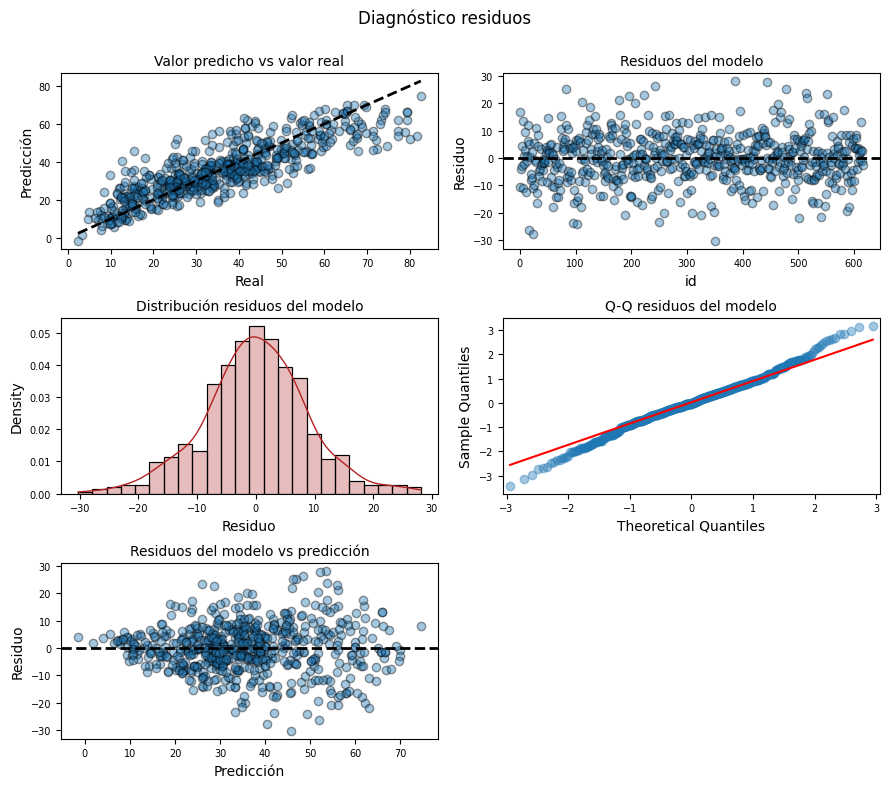

In [209]:
## Residuos del modelo
residuos = modelo_ols.resid

## Prediciones en conjunto entrenamiento
prediccion_train = modelo_ols.predict(X_ols)

## ------------------------------------------
## Representación 
## ------------------------------------------
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data     = residuos,
    stat     = "density",
    kde      = True,
    line_kws = {'linewidth': 1},
    color    = "firebrick",
    alpha    = 0.3,
    ax       = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

axes[2, 0].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12);

P-valor <0.05. Por lo tanto,  no aceptamos la hipótesis nula de que los residuos se distribuyen normalmente.

In [210]:
shapiro_test = stats.shapiro(residuos)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")



Test Shapiro-Wilk: estadístico = 0.9924971000742117, p-value = 0.0033937768315796006


#### Homocedasticidad

In [211]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

resid = modelo_ols.resid
exog  = modelo_ols.model.exog   # X con la constante tal cual se usó en el ajuste

lm, lm_p, fval, f_p = het_breuschpagan(resid, exog)
print(f"Breusch–Pagan: LM={lm:.3f}, p={lm_p:.4g} | F={fval:.3f}, p={f_p:.4g}")

# Interpretación rápida
if (lm_p < 0.05) or (f_p < 0.05):
    print("Rechazamos H0: hay evidencia de heterocedasticidad.")
else:
    print("No rechazamos H0: no hay evidencia suficiente de heterocedasticidad.")


Breusch–Pagan: LM=50.084, p=1.391e-08 | F=7.686, p=6.492e-09
Rechazamos H0: hay evidencia de heterocedasticidad.


#### Comprobación de colinealidad entre las variables predictoras

In [213]:
cols = predictores.columns.tolist()  # lista de columnas
X_vif = sm.add_constant(X_train_s[cols], has_constant='add')  # misma escala y constante

vif_df = pd.DataFrame({
    'variable': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_df = vif_df[~vif_df['variable'].isin(['const','intercept'])].sort_values('VIF', ascending=False)
vif_df


variable       VIF
5       x5  2.081610
3       x3  1.835382
4       x4  1.810474
1       x1  1.576140
2       x2  1.418335
6       x7  1.380980
7       x8  1.023208

Conclusión VIF. No se observan problemas de multicolinealidad: todos los VIF están entre 1.02 y 2.08, por debajo del umbral conservador de 5 (y muy lejos de 10). Las tolerancias (1/VIF) quedan entre 0.48 y 0.98 (> 0.20). Por tanto, las estimaciones de los coeficientes son estables y su interpretación individual es fiable; no es necesario eliminar ni combinar variables por colinealidad en el modelo actual. (Si incorporas términos cuadráticos o interacciones, vuelve a reevaluar los VIF.)